### Refining Data

In [239]:
import pandas as pd


In [240]:
crop_yield = pd.read_csv('E:\competition\SITNovate hack\SITNovate_blueberry\SITNovate\Data\crop_yield.csv')


In [241]:
crop_yield.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


### Data preprocessing Start

In [242]:
crop_yield

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [243]:
crop_yield.isna().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [244]:
crop_yield["Production"].describe()

count    1.968900e+04
mean     1.643594e+07
std      2.630568e+08
min      0.000000e+00
25%      1.393000e+03
50%      1.380400e+04
75%      1.227180e+05
max      6.326000e+09
Name: Production, dtype: float64

<Axes: ylabel='Production'>

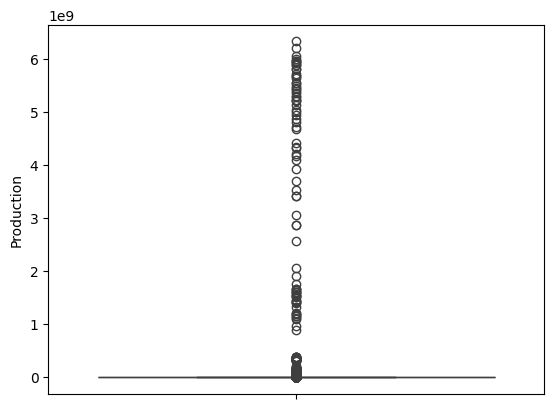

In [245]:
import seaborn as sns
sns.boxplot(crop_yield["Production"])

In [246]:
Q1 = crop_yield["Production"].quantile(0.25)
Q3 = crop_yield["Production"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for i in range(19689):
    if(crop_yield.loc[i,"Production"]<lower_bound or crop_yield.loc[i,"Production"]>upper_bound):
        crop_yield.drop(i,axis=0,inplace=True)

<Axes: ylabel='Production'>

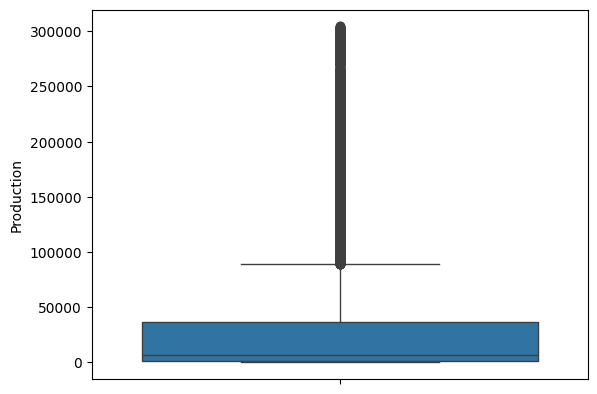

In [247]:
import seaborn as sns
sns.boxplot(crop_yield["Production"])

<Axes: xlabel='Production', ylabel='Count'>

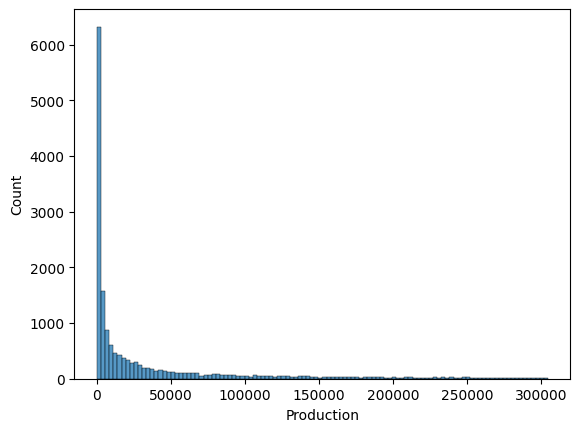

In [248]:
import seaborn as sns
sns.histplot(crop_yield["Production"])

In [249]:
crop_yield["Production"].value_counts()

Production
0         112
1          79
2          68
3          67
4          55
         ... 
26455       1
41760       1
68562       1
66379       1
205000      1
Name: count, Length: 10659, dtype: int64

In [250]:
crop_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,13587.0,9073,2051.4,1293074.79,4211.97,0.643636


In [251]:
freq_encode_cols = ["Crop","Season","State"]
for i in freq_encode_cols:
    freq_map = crop_yield.loc[:,i].value_counts().to_dict()
    crop_yield.loc[:,i+'_f'] = crop_yield.loc[:,i].map(freq_map)
    crop_yield.drop(columns=[i],inplace=True)

In [252]:
crop_yield


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_f,Season_f,State_f
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,147,2843,559
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,449,6894,559
2,1997,796.0,22,2051.4,75755.32,246.76,0.238333,278,6894,559
4,1997,1739.0,794,2051.4,165500.63,539.09,0.420909,310,6894,559
5,1997,13587.0,9073,2051.4,1293074.79,4211.97,0.643636,393,2843,559
...,...,...,...,...,...,...,...,...,...,...
19682,1998,30000.0,37000,1498.0,2964000.00,8700.00,1.225714,619,6894,677
19683,1998,141000.0,205000,1498.0,13930800.00,40890.00,1.441429,558,6894,677
19684,1998,4000.0,2000,1498.0,395200.00,1160.00,0.500000,484,6894,677
19685,1998,1000.0,3000,1498.0,98800.00,290.00,3.000000,300,4959,677


In [253]:
crop_yield['Production'].describe()



count     16316.000000
mean      34411.232287
std       60058.553653
min           0.000000
25%         849.750000
50%        6237.500000
75%       36149.750000
max      304516.000000
Name: Production, dtype: float64

In [254]:
crop_yield['Production'] = crop_yield['Production'].clip(upper=50000)  



In [255]:
crop_yield['Production'].describe()

count    16316.000000
mean     17336.605602
std      19815.704741
min          0.000000
25%        849.750000
50%       6237.500000
75%      36149.750000
max      50000.000000
Name: Production, dtype: float64

<Axes: xlabel='Production', ylabel='Count'>

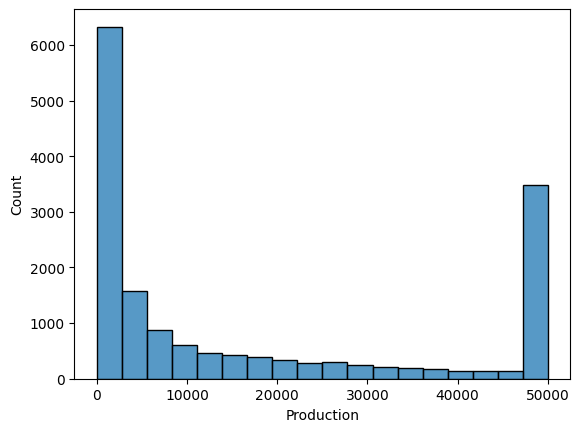

In [256]:
sns.histplot(crop_yield["Production"])

In [257]:
print(crop_yield['Production'].isna().sum())

0


In [258]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5 ,weights="uniform")
# crop_yield['Production'] = imputer.fit_transform(crop_yield[['Production']])

In [259]:
print(crop_yield['Production'].isna().sum())

0


In [260]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
crop_yield['Production'] = pt.fit_transform(
    crop_yield['Production'].values.reshape(-1, 1)
)


In [261]:
print(crop_yield['Production'].isna().sum())

0


<Axes: xlabel='Production', ylabel='Count'>

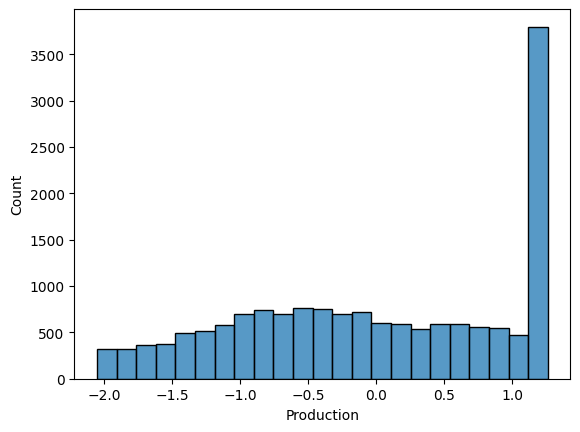

In [262]:
sns.histplot(crop_yield["Production"])

In [263]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
crop_yield["Production"] = mns.fit_transform(crop_yield[["Production"]])

In [264]:
print(crop_yield['Production'].isna().sum())

0


In [265]:
crop_yield

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_f,Season_f,State_f
0,1997,73814.0,1.000000,2051.4,7024878.38,22882.34,0.796087,147,2843,559
1,1997,6637.0,0.577101,2051.4,631643.29,2057.47,0.710435,449,6894,559
2,1997,796.0,0.115078,2051.4,75755.32,246.76,0.238333,278,6894,559
4,1997,1739.0,0.367188,2051.4,165500.63,539.09,0.420909,310,6894,559
5,1997,13587.0,0.676053,2051.4,1293074.79,4211.97,0.643636,393,2843,559
...,...,...,...,...,...,...,...,...,...,...
19682,1998,30000.0,0.934659,1498.0,2964000.00,8700.00,1.225714,619,6894,677
19683,1998,141000.0,1.000000,1498.0,13930800.00,40890.00,1.441429,558,6894,677
19684,1998,4000.0,0.467259,1498.0,395200.00,1160.00,0.500000,484,6894,677
19685,1998,1000.0,0.517285,1498.0,98800.00,290.00,3.000000,300,4959,677


<Axes: ylabel='Production'>

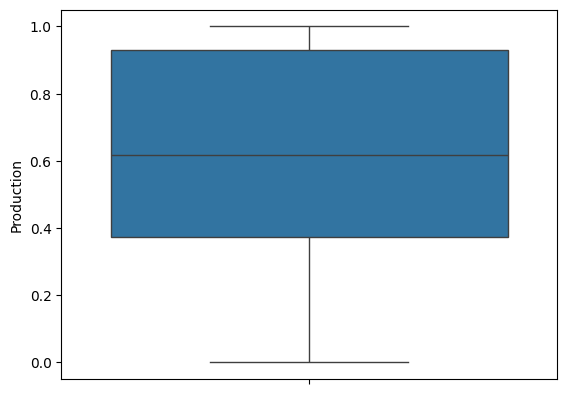

In [266]:
sns.boxplot(crop_yield["Production"])

<Axes: xlabel='Production', ylabel='Count'>

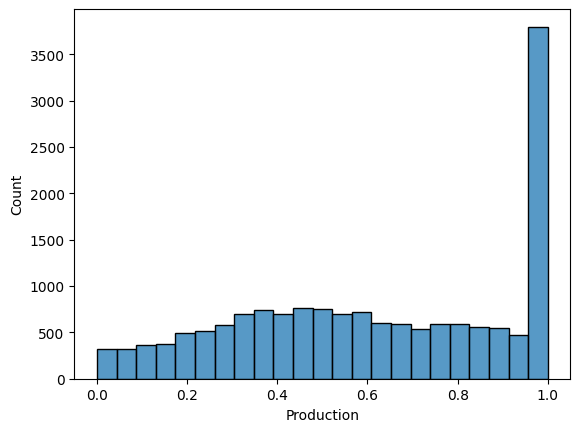

In [267]:
import seaborn as sns
sns.histplot(crop_yield["Production"])

In [268]:
crop_yield.columns

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield', 'Crop_f', 'Season_f', 'State_f'],
      dtype='object')

In [269]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5 ,weights="uniform")
# crop_yield['Production_transformed'] = imputer.fit_transform(crop_yield[['Production_transformed']])

In [270]:
print(crop_yield['Production'].isna().sum())

0


<Axes: xlabel='Production', ylabel='Count'>

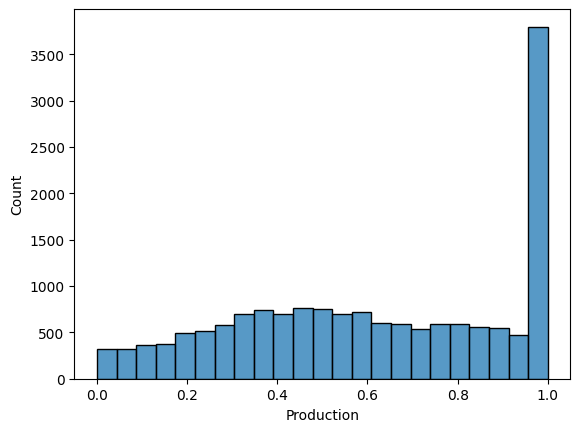

In [271]:
import seaborn as sns
sns.histplot(crop_yield["Production"])

## Model Training

In [272]:
from sklearn.model_selection import train_test_split
x=crop_yield.drop('Production' , axis=1)
y=crop_yield['Production']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [273]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import root_mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization
import xgboost as xgb

In [274]:
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np


def xgb_cv(max_depth, learning_rate, n_estimators, gamma, min_child_weight, subsample, colsample_bytree):
    params = {
        'max_depth': int(max_depth),
        'learning_rate': learning_rate,
        'n_estimators': int(n_estimators),
        'gamma': gamma,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'objective': 'reg:squarederror',  # Regression objective
        'eval_metric': 'rmse',           
        'random_state': 42
    }

    # Perform cross-validation
    cv_results = cross_val_score(
        XGBRegressor(**params),
        x_train, y_train,
        scoring='neg_mean_squared_error',  # Use negative MSE for regression
        cv=5
    )

    
    return cv_results.mean()







In [275]:
pbounds = {
    'max_depth': (3, 10),          
    'learning_rate': (0.01, 0.2),  
    'n_estimators': (100, 1000),   
    'gamma': (0, 5),               
    'min_child_weight': (1, 10),   
    'subsample': (0.6, 1.0),       
    'colsample_bytree': (0.6, 1.0) 
}


optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=pbounds,
    random_state=42
)

In [276]:
crop_yield['Production']

0        1.000000
1        0.577101
2        0.115078
4        0.367188
5        0.676053
           ...   
19682    0.934659
19683    1.000000
19684    0.467259
19685    0.517285
19687    0.599625
Name: Production, Length: 16316, dtype: float64

In [277]:
optimizer.maximize(
    init_points=10,  
    n_iter=50     
)


print("Best Parameters:", optimizer.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------
| 1         | -0.004869 | 0.7498    | 4.754     | 0.1491    | 7.191     | 2.404     | 240.4     | 0.6232    |
| 2         | -0.003345 | 0.9465    | 3.006     | 0.1445    | 3.144     | 9.729     | 849.2     | 0.6849    |
| 3         | -0.001724 | 0.6727    | 0.917     | 0.06781   | 6.673     | 4.888     | 362.1     | 0.8447    |
| 4         | -0.002217 | 0.6558    | 1.461     | 0.07961   | 6.192     | 8.067     | 279.7     | 0.8057    |
| 5         | -0.001145 | 0.837     | 0.2323    | 0.1254    | 4.194     | 1.585     | 954.0     | 0.9863    |
| 6         | -0.002018 | 0.9234    | 1.523     | 0.02856   | 7.79      | 4.961     | 209.8     | 0.7981    |
| 7         | -0.004213 | 0.6138    | 4.547     | 0.05917   | 7.638     | 3.805     | 568.1     | 0.8187    |
| 8       

KeyboardInterrupt: 

In [278]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

params = {
            'max_depth': int(6.706668412760893),
        'learning_rate': 0.16473482574069512,
        'n_estimators': int(933.141303840674),
        'gamma':  0.007837999167149556,
        'min_child_weight':  9.667832236580104,
        'subsample': 0.9591055297785313,
        'colsample_bytree': 0.6122476266040441,
        'objective': 'reg:squarederror',  # Regression objective
        'eval_metric': 'rmse',           
        'random_state': 42


}

model = xgb.XGBRegressor(**params)

scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),  # Negative MSE
    'mae': make_scorer(mean_absolute_error, greater_is_better=False), # Negative MAE
    'r2': make_scorer(r2_score)                                       # R² Score
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = cross_val_score(model, x_train, y_train, scoring=scoring['mse'], cv=kf)
mae_scores = cross_val_score(model, x_train, y_train, scoring=scoring['mae'], cv=kf)
r2_scores = cross_val_score(model, x_train, y_train, scoring=scoring['r2'], cv=kf)

In [279]:
print(f'Mean squared error on training data (Negative): {np.mean(mse_scores):.4f}')
print(f'Mean absolute error scores on training data (Negative) : {np.mean(mae_scores):.4f}')
print(f'Mean R2_score on training data: {np.mean(r2_scores):.4f}')

Mean squared error on training data (Negative): -0.0008
Mean absolute error scores on training data (Negative) : -0.0171
Mean R2_score on training data: 0.9917


In [280]:
print(x_train.shape)
print(x_test.shape)

(13052, 9)
(3264, 9)


In [281]:
model.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6122476266040441, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0.007837999167149556,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.16473482574069512,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=9.667832236580104, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=933,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [282]:
y_pred = model.predict(x_test)

In [283]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
mse = mean_squared_error(y_pred , y_test)
mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_pred , y_test)
print('MSE:' , mse)
print('MAE' , mae)
print('R2' , r2)


MSE: 0.0008168532112369523
MAE 0.01742580423439395
R2 0.9909311941255714


In [284]:
x_train.columns

Index(['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide',
       'Yield', 'Crop_f', 'Season_f', 'State_f'],
      dtype='object')

In [285]:
import pickle


with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)


## 4. Generate Tailored Recommendations

### Feature Important analysis

In [288]:
# For XGBoost/Random Forest
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

           Feature  Importance
3       Fertilizer    0.385013
1             Area    0.312933
4        Pesticide    0.160459
5            Yield    0.087396
7         Season_f    0.025139
6           Crop_f    0.018490
2  Annual_Rainfall    0.004781
0        Crop_Year    0.003748
8          State_f    0.002039


In [234]:
crop_yield.columns

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield', 'Crop_f', 'Season_f', 'State_f'],
      dtype='object')

### Neural Network

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))  # Output layer for regression
# model.compile(optimizer='adam', loss='mse')
# model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
327/327 [==============================] - 1s 1ms/step - loss: 121251856384.0000 - val_loss: 2361499.2500
Epoch 2/50
327/327 [==============================] - 0s 833us/step - loss: 1984946.2500 - val_loss: 2002083.1250
Epoch 3/50
327/327 [==============================] - 0s 856us/step - loss: 2344181.7500 - val_loss: 1864615.5000
Epoch 4/50
327/327 [==============================] - 0s 837us/step - loss: 3104406.5000 - val_loss: 1813247.3750
Epoch 5/50
327/327 [==============================] - 0s 841us/step - loss: 2193075.0000 - val_loss: 1537810.6250
Epoch 6/50
327/327 [==============================] - 0s 839us/step - loss: 3081265.0000 - val_loss: 2612702.0000
Epoch 7/50
327/327 [==============================] - 0s 881us/step - loss: 12327858.0000 - val_loss: 2298947.0000
Epoch 8/50
327/327 [==============================] - 0s 901us/step - loss: 2141588.0000 - val_loss: 9282200.0000
Epoch 9/50
327/327 [==============================] - 0s 958us/step - loss: 4467200.

using Neural Network is an overkill !!!

## Generate Tailored Recommendations

### Feature Importance Analysis

In [289]:
# For XGBoost/Random Forest
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

           Feature  Importance
3       Fertilizer    0.385013
1             Area    0.312933
4        Pesticide    0.160459
5            Yield    0.087396
7         Season_f    0.025139
6           Crop_f    0.018490
2  Annual_Rainfall    0.004781
0        Crop_Year    0.003748
8          State_f    0.002039


### Recommendation Logic